In [1]:
import pandas as pd
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
testing=([0,20],[10,20],[20,10],[20,0],[20,-10],[10,-20],[0,-20],[-10,20],[-20,-10],[-20,0],[-20,10],[-10,20])
# these are the testing co-ordinates where I will find the food

In [3]:
def direction(a): # function determing the direction of the movement and then adding the distance also.
    if a==1: #North
        cord=pd.DataFrame([[0,10,10]],columns=list('XYD'))
    elif a==2: #South
        cord=pd.DataFrame([[0,-10,10]],columns=list('XYD'))
    elif a==3: #East
        cord=pd.DataFrame([[10,0,10]],columns=list('XYD'))
    elif a==4: #West
        cord=pd.DataFrame([[-10,0,10]],columns=list('XYD'))
    else:
        raise ValueError("Enter Number between 1-4")
    return cord
        

In [4]:
initial_cordinate=pd.DataFrame([[0,0,0]],columns=list('XYD')) # initially at (0,0,0)

In [5]:
def time():
    ap=pd.DataFrame()
    cordinate=initial_cordinate
    for i in range(1,500):
        number=random.randint(1,4)
        cordinate=cordinate+direction(number) # Now, i am moving in random direction
        data=cordinate
        k=data.iloc[:,:2]
        k_1=data.iloc[:,:3]
        j=list(k.iloc[0])  # Testing the new cor-ordinate, if it satisfy the condition of being at food point save the point else start again
        if j in testing:
            ap=ap.append(k_1)
            cordinate=initial_cordinate
        else:
            pass
    return ap
    

In [6]:
t=pd.DataFrame()

In [7]:
for a in range(0,500):  # Doing the iteration of calculating the time again to increase the accuracy
    y=time()
    if y.empty:
        pass
    else:
        y=y.iloc[:,2]
        y=pd.Series(y.mean())
        t=t.append(y/10,ignore_index=True)
        a=a+1
    

In [8]:
t.columns=['Time']

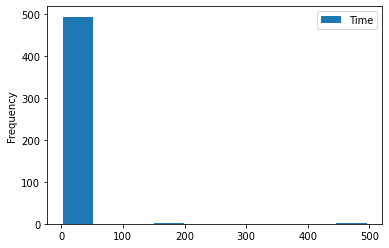

In [9]:
t.plot.hist() # Distribution of the Time variable

In [19]:
t.mean()  #Answer: Average time

Time    6.834863
dtype: float64

In [20]:
t.std() #Standard Deviation

Time    23.358135
dtype: float64

In [21]:
CI_u,CI_l=(t.mean()+1.96*((t.std())/np.sqrt(len(t)))),(t.mean()-1.96*((t.std())/np.sqrt(len(t))))

In [22]:
CI_u,CI_l #confidence Interval Upper and Lower at 95% 

(Time    8.890533
 dtype: float64,
 Time    4.779193
 dtype: float64)

In [23]:
t.min()  # Minimum time 

Time    2.0
dtype: float64

In [24]:
t.max() # Maximum time

Time    496.0
dtype: float64